In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [3]:
def save_figure(filename):
    folder_path = 'C:\\Users\\Tee\\senior_project\\src\\figure_png_pdf_svg'
    formats = ['pdf', 'png', 'svg']
    for mat in formats:
        fig_path = os.path.join(folder_path, '{}_file'.format(mat) , '{}.{}'.format(filename,mat))
        plt.savefig(fig_path, format= mat, bbox_inches="tight", dpi =200)

In [4]:
DATA_FOLDER ='C:\\Users\\Tee\\senior_project\\src\\SolarMap\\DataAndResult\\training_data'
filename = 'separated_DATASET_cloudmask.csv'

# Cloudmask dataset

In [5]:
df = pd.read_csv(os.path.join(DATA_FOLDER,filename),parse_dates=['Datetime'],index_col='Datetime')

In [6]:
df.head()

,site_name,I,Iclr,k,k_bar,HR,CI0,CI1,CI_1,CI_2,...,CI_16,CI_17,CI_18,CI_19,CI_20,CI_21,CI_22,CI_23,CI_24,CI_25
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-07 08:00:00+07:00,ISL001,219.9951,172.570155,1.274815,1.032743,8,0.023529,0.023529,0.015686,0.019608,...,0.015686,0.015686,0.019608,0.035294,0.035294,0.015686,0.011765,0.019608,0.027451,0.039216
2022-02-07 08:30:00+07:00,ISL001,335.4066,288.475645,1.162686,1.032743,8,0.011765,0.023529,0.015686,0.015686,...,0.015686,0.015686,0.011765,0.011765,0.011765,0.015686,0.015686,0.011765,0.011765,0.015686
2022-02-07 09:00:00+07:00,ISL001,451.1106,401.491557,1.123587,1.032743,9,0.007843,0.011765,0.007843,0.011765,...,0.007843,0.007843,0.007843,0.011765,0.011765,0.007843,0.007843,0.003922,0.007843,0.011765
2022-02-07 09:30:00+07:00,ISL001,541.9034,506.299490,1.070322,1.032743,9,0.007843,0.007843,0.015686,0.011765,...,0.007843,0.007843,0.007843,0.019608,0.019608,0.007843,0.007843,0.007843,0.011765,0.019608
2022-02-07 10:00:00+07:00,ISL001,607.9678,599.632417,1.013901,1.032743,10,0.027451,0.007843,0.000000,0.011765,...,0.000000,0.000000,0.019608,0.031373,0.023529,0.000000,0.000000,0.015686,0.023529,0.011765


In [7]:
df['ICI'] = df.CI0*df.Iclr
df.head()

,site_name,I,Iclr,k,k_bar,HR,CI0,CI1,CI_1,CI_2,...,CI_17,CI_18,CI_19,CI_20,CI_21,CI_22,CI_23,CI_24,CI_25,ICI
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-07 08:00:00+07:00,ISL001,219.9951,172.570155,1.274815,1.032743,8,0.023529,0.023529,0.015686,0.019608,...,0.015686,0.019608,0.035294,0.035294,0.015686,0.011765,0.019608,0.027451,0.039216,4.060474
2022-02-07 08:30:00+07:00,ISL001,335.4066,288.475645,1.162686,1.032743,8,0.011765,0.023529,0.015686,0.015686,...,0.015686,0.011765,0.011765,0.011765,0.015686,0.015686,0.011765,0.011765,0.015686,3.393831
2022-02-07 09:00:00+07:00,ISL001,451.1106,401.491557,1.123587,1.032743,9,0.007843,0.011765,0.007843,0.011765,...,0.007843,0.007843,0.011765,0.011765,0.007843,0.007843,0.003922,0.007843,0.011765,3.148953
2022-02-07 09:30:00+07:00,ISL001,541.9034,506.299490,1.070322,1.032743,9,0.007843,0.007843,0.015686,0.011765,...,0.007843,0.007843,0.019608,0.019608,0.007843,0.007843,0.007843,0.011765,0.019608,3.970976
2022-02-07 10:00:00+07:00,ISL001,607.9678,599.632417,1.013901,1.032743,10,0.027451,0.007843,0.000000,0.011765,...,0.000000,0.019608,0.031373,0.023529,0.000000,0.000000,0.015686,0.023529,0.011765,16.460498


feature 1 : Iclr  
feature 2 : CI  
feature 3 : Iclr*CI  
feature 4 : Iclr,CI  
feature 5 : Iclr,Iclr*CI  
feature 6:  CI,Iclr*CI  
feature  7: Iclr, CI,Iclr*CI  

In [60]:
X = df[['site_name','Iclr','CI0','ICI']]
y = df[['site_name','I']]

In [61]:
X

,site_name,Iclr,CI0,ICI
Datetime,,,,
2022-02-07 08:00:00+07:00,ISL001,172.570155,0.023529,4.060474
2022-02-07 08:30:00+07:00,ISL001,288.475645,0.011765,3.393831
2022-02-07 09:00:00+07:00,ISL001,401.491557,0.007843,3.148953
2022-02-07 09:30:00+07:00,ISL001,506.299490,0.007843,3.970976
2022-02-07 10:00:00+07:00,ISL001,599.632417,0.027451,16.460498
...,...,...,...,...
2023-02-02 14:00:00+07:00,ISL056,744.146530,0.078431,58.364434
2023-02-02 14:30:00+07:00,ISL056,683.623192,0.082353,56.298380
2023-02-02 15:00:00+07:00,ISL056,607.338102,0.074510,45.252643


# Model training (Linear regression)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train = X_train.drop(columns=['site_name'])
y_train = y_train.drop(columns=['site_name'])

ft1:X_train[['IC0']]
ft2:X_train[['CI0']]
ft3:X_train[['ICI']]
ft4:X_train[['IC0','CI0']]
ft5:X_train[['IC0','ICI']]
ft6:X_train[['CI0','ICI']]
ft7:X_train[['IC0','CI0','ICI']]

In [63]:
predictors ={'ft1':X_train[['Iclr']],
             'ft2':X_train[['CI0']],
             'ft3':X_train[['ICI']],
             'ft4':X_train[['Iclr','CI0']],
             'ft5':X_train[['Iclr','ICI']],
             'ft6':X_train[['CI0','ICI']],
             'ft7':X_train[['Iclr','CI0','ICI']]}

## Model selection criterion

In [64]:
train_score=[]
test_score=[]
aic = []
bic = []
for predictor in predictors:
    print(predictor,end='\r')
    feature =  predictors[predictor]
    model = LinearRegression()
    cve=cross_validate(model, feature,y_train, cv=5, scoring='neg_mean_absolute_error',return_train_score=True)
    regr = OLS(y_train, add_constant(feature)).fit()
    train_score.append(-cve['train_score'].mean())
    test_score.append(-cve['test_score'].mean())
    aic.append(regr.aic/regr.nobs)
    bic.append(regr.bic/regr.nobs)

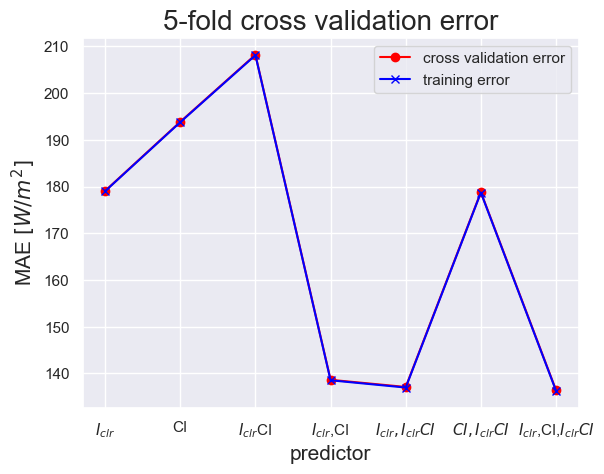

In [65]:
sns.set()
ind = [d for d in range(7)]
plt.plot(ind ,test_score,'-o',color='red',label = "cross validation error")
plt.plot(ind ,train_score,'-x',color='blue',label = "training error")
plt.legend()
plt.xlabel('predictor',fontsize=15)
plt.ylabel('MAE $[W/m^2]$',fontsize=15)
plt.title('5-fold cross validation error',fontsize=20)
plt.xticks(ind,['$I_{clr}$','CI','$I_{clr}$CI','$I_{clr}$,CI','$I_{clr},I_{clr}CI$','$CI,I_{clr}CI$','$I_{clr}$,CI,$I_{clr}CI$']);

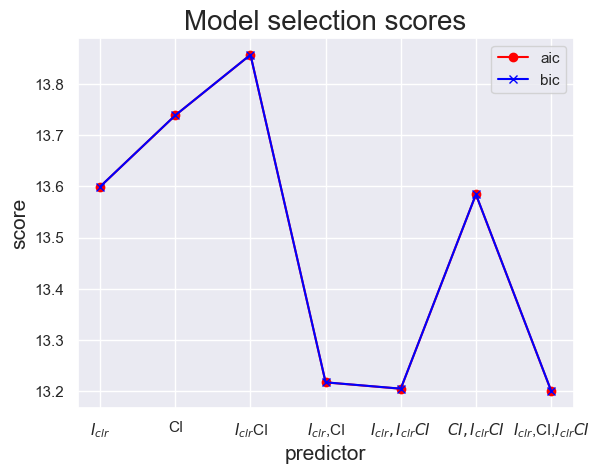

In [66]:
sns.set()
plt.plot(ind ,aic,'-o',color='red',label = "aic")
plt.plot(ind ,bic,'-x',color='blue',label = "bic")
plt.legend()
plt.xlabel('predictor',fontsize=15)
plt.ylabel('score',fontsize=15)
plt.title('Model selection scores',fontsize=20)
plt.xticks(ind,['$I_{clr}$','CI','$I_{clr}$CI','$I_{clr}$,CI','$I_{clr},I_{clr}CI$','$CI,I_{clr}CI$','$I_{clr}$,CI,$I_{clr}CI$']);

In [67]:
model = LinearRegression()
model.fit(X_train,y_train)
y_test['linear'] = model.predict(X_test.drop(columns=['site_name']))
np.sqrt(mean_squared_error(y_test[['I']], y_test[['OLS']]))

177.56289421344

In [68]:
print(model.coef_)
print(model.intercept_)

[[   0.84219415 -171.10322559   -0.48285853]]
[92.07416722]


In [69]:
compare = y_test.copy()
compare.head()

,site_name,I,OLS
Datetime,,,
2022-03-28 11:00:00+07:00,ISL001,913.0125,761.467627
2022-03-28 11:30:00+07:00,ISL001,884.1139,785.840251
2022-03-28 12:00:00+07:00,ISL001,987.1979,795.125781
2022-03-28 12:30:00+07:00,ISL001,874.7495,784.416616
2022-03-28 13:00:00+07:00,ISL001,824.3415,766.555142


# Model training (Polynomial Regression)

In [6]:
X = df[['site_name','Iclr','CI0']]
y = df[['site_name','k']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train = X_train.drop(columns=['site_name'])
y_train = y_train.drop(columns=['site_name'])

## 5-fold cross validation

In [8]:
train_score=[]
test_score=[]
degress = [int(d) for d in range(1,16)]
for e in degress:
    poly = PolynomialFeatures(degree=e, include_bias=False)
    poly_features = poly.fit_transform(X_train[['CI0']])
    poly_features = poly_features
    poly_reg_model = LinearRegression()
    cve=cross_validate(poly_reg_model, poly_features, y_train, cv=5, scoring='neg_mean_absolute_error',return_train_score=True)
    train_score.append(-cve['train_score'].mean())
    test_score.append(-cve['test_score'].mean())

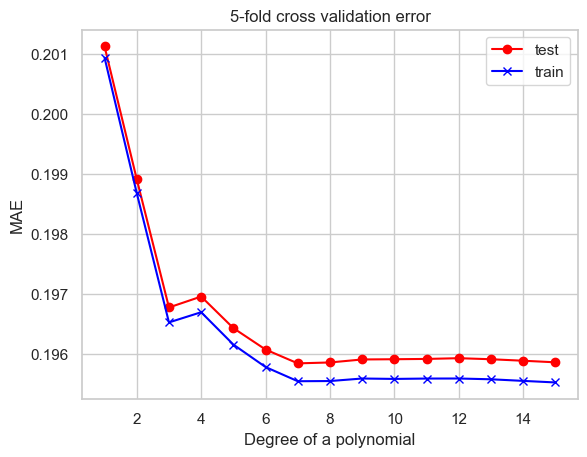

In [10]:
sns.set(style = 'whitegrid')
plt.plot(degress ,test_score,'-o',label = "test",color='red')
plt.plot(degress ,train_score,'-x',label = "train",color='blue')
plt.legend()
plt.xlabel('Degree of a polynomial')
plt.ylabel('MAE')
plt.title('5-fold cross validation error')
save_figure('POLY_vart_m')

In [74]:
poly = PolynomialFeatures(degree=8, include_bias=False)
poly_features = poly.fit_transform(X_train[['CI0']])
poly_features = poly_features
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features,y_train)
poly_test = poly.fit_transform(X_test[['CI0']])
y_test['khat'] = poly_reg_model.predict(poly_test)
y_test['Iclr'] = X_test.Iclr
y_test['I'] = y_test.k*y_test.Iclr
y_test['Ihat']=y_test.khat*y_test.Iclr
mean_absolute_error(y_test[['I']], y_test[['Ihat']])

131.81512116388953

In [75]:
print(poly_reg_model.coef_)
print(poly_reg_model.intercept_)

[[ 1.87835636e+00 -6.05635271e+01  4.21503878e+02 -1.43674348e+03
   2.72834645e+03 -2.93934369e+03  1.67825651e+03 -3.94104516e+02]]
[1.03097027]


In [81]:
compare['poly'] = y_test.Ihat
compare

,site_name,I,OLS,PLS
Datetime,,,,
2022-03-28 11:00:00+07:00,ISL001,913.0125,761.467627,759.682233
2022-03-28 11:30:00+07:00,ISL001,884.1139,785.840251,771.950392
2022-03-28 12:00:00+07:00,ISL001,987.1979,795.125781,770.161851
2022-03-28 12:30:00+07:00,ISL001,874.7495,784.416616,747.302378
2022-03-28 13:00:00+07:00,ISL001,824.3415,766.555142,725.710912
...,...,...,...,...
2023-02-02 14:00:00+07:00,ISL056,635.0856,677.188392,715.999561
2023-02-02 14:30:00+07:00,ISL056,578.7385,626.542610,651.978193
2023-02-02 15:00:00+07:00,ISL056,508.4064,568.971268,589.454527


In [82]:
compare.to_csv('Ihat_cmRegress.csv')